In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("diabetes_dataset 2.csv")
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


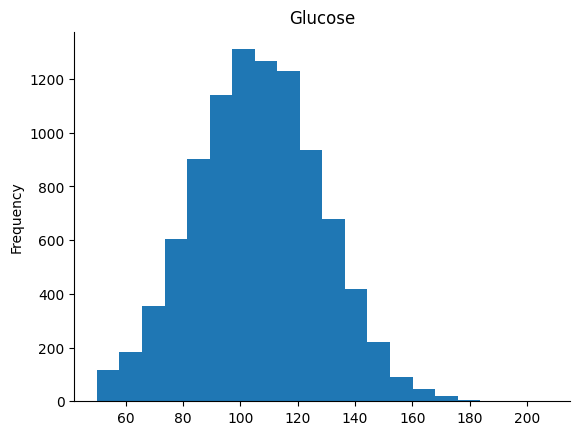

In [8]:
# @title Glucose

from matplotlib import pyplot as plt
data['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
X, y = df.drop(['Outcome'], axis=1), df['Outcome']

In [14]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_Train, y_Train)

DecisionTreeClassifier(max_depth=3, random_state=42)

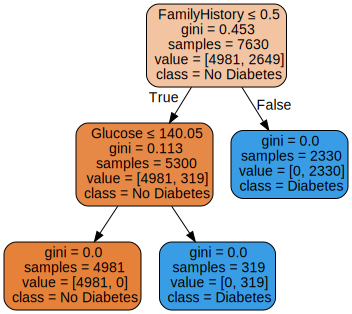

In [21]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X.columns,
                           class_names=["No Diabetes", "Diabetes"],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph

In [22]:
from sklearn.metrics import accuracy_score
y_pred = tree.predict(X_Test)
accuracy_score(y_Test, y_pred)

1.0